# EC KC and Hep and new data from angela; sigle replicate calc for all sen cells

In [24]:
#load modules
import senepy as sp
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rc_context

In [3]:
# import gene hubs for mouse
hubs = sp.load_hubs(species = 'Mouse')
hubs.metadata[hubs.metadata.tissue == 'Liver']

,tissue,cell,hub_num,size,n_sen,hyp
41,Liver,Kupffer cell,0,1708,10,0.955715
42,Liver,Kupffer cell,1,401,9,0.011746
43,Liver,endothelial cell of hepatic sinusoid,0,277,10,0.000244
44,Liver,endothelial cell of hepatic sinusoid,1,227,10,0.000047
45,Liver,hepatocyte,0,1088,12,0.293804
46,Liver,hepatocyte,1,140,6,0.001841


In [4]:
# loading data and exclude 1 month old mice
k_adata = sc.read_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//droplet_liver_angela.h5ad')
k_adata = k_adata[k_adata.obs['age'] != '1m']
h_adata = sc.read_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//droplet_liver_angela.h5ad')
h_adata = h_adata[h_adata.obs['age'] != '1m']
e_adata = sc.read_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//droplet_liver_angela.h5ad')
e_adata = e_adata[e_adata.obs['age'] != '1m']

In [5]:
# define subsets for each cell type
kup_subset = k_adata[k_adata.obs['cell_type'] == 'Kupffer cell'].copy()
hep_subset = h_adata[h_adata.obs['cell_type'] == 'hepatocyte'].copy()
ec_subset = e_adata[e_adata.obs['cell_type'] == 'endothelial cell of hepatic sinusoid'].copy()

In [6]:
# change the var_names to gene name instead of ensembl so senepy recognises it

kup_subset.var = kup_subset.var.set_index('feature_name')
hep_subset.var = hep_subset.var.set_index('feature_name')
ec_subset.var = ec_subset.var.set_index('feature_name')

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


In [7]:
# defining hub number and perform senescoring
kup_subset0 = kup_subset.copy()
kup_subset0.obs['sen_score'] = sp.score_hub(kup_subset0, hubs.hubs[('Liver', 'Kupffer cell', 0)])
kup_subset1 = kup_subset.copy()
kup_subset1.obs['sen_score'] = sp.score_hub(kup_subset1, hubs.hubs[('Liver', 'Kupffer cell', 1)])

hep_subset0 = hep_subset.copy()
hep_subset0.obs['sen_score'] = sp.score_hub(hep_subset0, hubs.hubs[('Liver', 'hepatocyte', 0)])
hep_subset1 = hep_subset.copy()
hep_subset1.obs['sen_score'] = sp.score_hub(hep_subset1, hubs.hubs[('Liver', 'hepatocyte', 1)])

ec_subset0 = ec_subset.copy()
ec_subset0.obs['sen_score'] = sp.score_hub(ec_subset0, hubs.hubs[('Liver', 'endothelial cell of hepatic sinusoid', 0)])
ec_subset1 = ec_subset.copy()
ec_subset1.obs['sen_score'] = sp.score_hub(ec_subset1, hubs.hubs[('Liver', 'endothelial cell of hepatic sinusoid', 1)])

1480/1708(86.65%) genes present in data
###################
Not present: ['BC026585', 'C330027C09Rik', 'Fam55d', 'A130022J15Rik', 'E130012A19Rik', 'March7', '6720463M24Rik', 'Siglec5', '4930534B04Rik', 'Hmga2-ps1', 'Pira6', '2310003L22Rik', 'Gm12504', 'BC052040', 'Fam35a', 'D3Bwg0562e', '1110034A24Rik', 'Myst4', 'Atp5sl', 'D2Ertd750e', 'BC088983', 'B230120H23Rik', 'BC032203', '4632434I11Rik', 'Prmt10', 'Mtap7d3', 'Fam116b', 'Fam179b', 'Ccdc76', '4930415F15Rik', 'Sip1', 'Tmem8', 'Tsga14', '2310004I24Rik', 'Hist1h2ag', 'Gm16515', 'Dus2l', '2610044O15Rik', 'C030046E11Rik', 'Hist1h1a', 'Ccdc94', 'BC024479', '2610002D18Rik', '1700011I03Rik', 'Wdr8', 'A830080D01Rik', 'Gm996', 'BC046404', '1810033B17Rik', '6030446N20Rik', '1300010F03Rik', 'BC068157', 'Bzrap1', 'Gm505', 'Hist1h4f', 'BC023829', 'Fam33a', 'BC029214', 'Atp5s', '5730419I09Rik', 'D9Ertd402e', '2210009G21Rik', '3010026O09Rik', 'Hist1h2bm', 'BC068281', 'A230051G13Rik', 'Diap3', 'Kdelc1', 'Gm16197', 'Lin54', 'D6Mm5e', 'Fam113a', 'Ankr

In [8]:
## check if sen score of hub 0 or 1 is higher and chose higher one
# Hepatocytes

hep_subset_combo = hep_subset0.copy()
hep_subset_combo.obs['sen_score_combined'] = 0
hep_subset_combo.obs['sen_score_hub0'] = 0
hep_subset_combo.obs['sen_score_hub1'] = 0

for index in range(len(hep_subset0.obs_names)):
    cell_name = hep_subset0.obs_names[index]
    sen_score_0 = hep_subset0.obs['sen_score'][index]
    sen_score_1 = hep_subset1.obs['sen_score'][index]
    hep_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
    hep_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
   
    if sen_score_0 > sen_score_1:
        hep_subset_combo.obs['sen_score_combined'][index] = sen_score_0
        #print('sen score 0: ', sen_score_0, 'sen score 1: ', sen_score_1)
    elif sen_score_1 > sen_score_0:
        hep_subset_combo.obs['sen_score_combined'][index] = sen_score_1
        #print('sen score 1: ', sen_score_1, 'sen score 0: ', sen_score_0)


C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\2341119665.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hep_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\2341119665.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hep_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\2341119665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [9]:
## check if sen score of hub 0 or 1 is higher and chose higher one
# Hepatocytes

kup_subset_combo = kup_subset0.copy()
kup_subset_combo.obs['sen_score_combined'] = 0
kup_subset_combo.obs['sen_score_hub0'] = 0
kup_subset_combo.obs['sen_score_hub1'] = 0

for index in range(len(hep_subset0.obs_names)):
    cell_name = kup_subset0.obs_names[index]
    sen_score_0 = kup_subset0.obs['sen_score'][index]
    sen_score_1 = kup_subset1.obs['sen_score'][index]
    kup_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
    kup_subset_combo.obs['sen_score_hub1'][index] = sen_score_1

    if sen_score_0 > sen_score_1:
        kup_subset_combo.obs['sen_score_combined'][index] = float(sen_score_0)
        #print('sen score 0: ', sen_score_0, 'sen score 1: ', sen_score_1)
    elif sen_score_1 > sen_score_0:
        kup_subset_combo.obs['sen_score_combined'][index] = float(sen_score_1)
        #print('sen score 1: ', sen_score_1, 'sen score 0: ', sen_score_0)

C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\184968512.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kup_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\184968512.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kup_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\184968512.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [10]:
## check if sen score of hub 0 or 1 is higher and chose higher one
# endothelial cells

ec_subset_combo = ec_subset0.copy()
ec_subset_combo.obs['sen_score_combined'] = 0
ec_subset_combo.obs['sen_score_hub0'] = 0
ec_subset_combo.obs['sen_score_hub1'] = 0

for index in range(len(ec_subset0.obs_names)):
    cell_name = ec_subset0.obs_names[index]
    sen_score_0 = ec_subset0.obs['sen_score'][index]
    sen_score_1 = ec_subset1.obs['sen_score'][index]
    ec_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
    ec_subset_combo.obs['sen_score_hub1'][index] = sen_score_1

    if sen_score_0 > sen_score_1:
        ec_subset_combo.obs['sen_score_combined'][index] = float(sen_score_1)
        #print('sen score 0: ', sen_score_0, 'sen score 1: ', sen_score_1)
    elif sen_score_1 > sen_score_0:
        ec_subset_combo.obs['sen_score_combined'][index] = float(sen_score_1)
        #print('sen score 1: ', sen_score_1, 'sen score 0: ', sen_score_0)

C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\2008955256.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\2008955256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
C:\Users\Helene\AppData\Local\Temp\ipykernel_8248\2008955256.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [11]:
## calculate mean and threshold
# Kupffer cells
m_kc = kup_subset_combo.obs.sen_score.mean()
std_kc = kup_subset_combo.obs.sen_score.std() 
thresh = m_kc + 2*std_kc

#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

#map function to a new row in adata.obs
kup_subset_combo.obs['putative_sen'] = kup_subset_combo.obs.sen_score.map(is_putative_sen)
kup_sen = kup_subset_combo[kup_subset_combo.obs['putative_sen'] == 1]

In [12]:
## calculate mean and threshold
# hepatocytes

m_hc = hep_subset_combo.obs.sen_score.mean()
std_hc = hep_subset_combo.obs.sen_score.std() 
thresh = m_hc + 2*std_hc

#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

#map function to a new row in adata.obs
hep_subset_combo.obs['putative_sen'] = hep_subset_combo.obs.sen_score.map(is_putative_sen)
hep_sen = hep_subset_combo[hep_subset_combo.obs['putative_sen'] == 1]

In [13]:
## calculate mean and threshold
# endothelial cells

m_hc = ec_subset_combo.obs.sen_score.mean()
std_hc = ec_subset_combo.obs.sen_score.std() 
thresh = m_hc + 2*std_hc

#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

#map function to a new row in adata.obs

ec_subset_combo.obs['putative_sen'] = ec_subset_combo.obs.sen_score.map(is_putative_sen)
ec_sen = ec_subset_combo[ec_subset_combo.obs['putative_sen'] == 1]

Visualise results for hepatocytes

<Axes: >

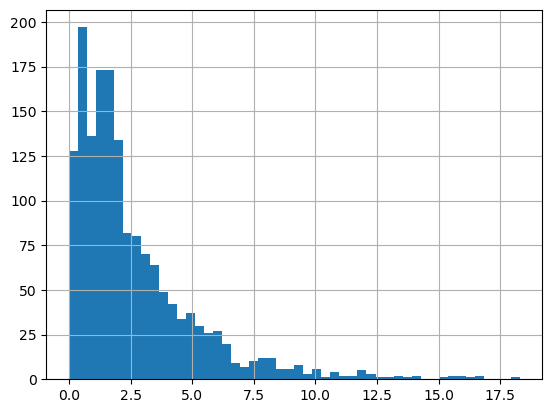

In [14]:
hep_subset_combo.obs.sen_score_combined.hist(bins = 50)

In [15]:
## Calculate mean sen score for each timepoint
#Hepatocytes

# define cell groups per timepoint
m3_sen = hep_sen[hep_sen.obs.age == '3m']
m18_sen = hep_sen[hep_sen.obs.age == '18m']
m21_sen = hep_sen[hep_sen.obs.age == '21m']
m24_sen = hep_sen[hep_sen.obs.age == '24m']
m30_sen = hep_sen[hep_sen.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df


,Age,Mean,Std,N-cells
0,3,9.560339,2.330935,17
1,18,8.835584,0.728634,2
2,21,10.448789,2.454894,52
3,24,12.396364,3.332881,11
4,30,10.684331,1.836224,2


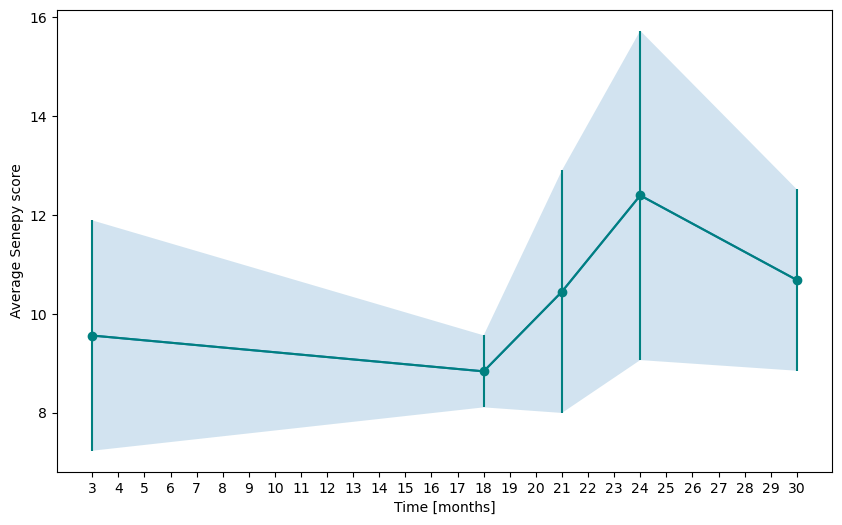

In [16]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


Visualise results for Kupffer cells

<Axes: >

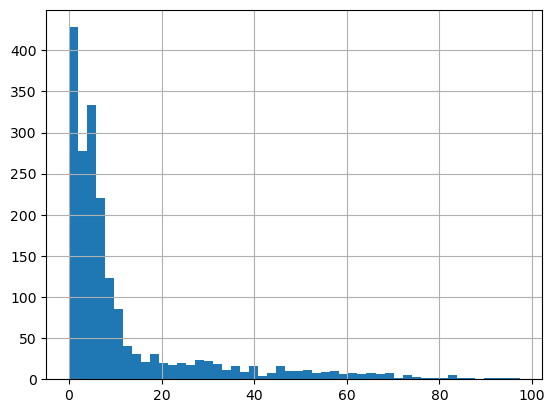

In [17]:
kup_subset_combo.obs.sen_score_combined.hist(bins = 50)

In [18]:
## Calculate mean sen score for each timepoint
# KC

# define cell groups per timepoint
m3_sen = kup_subset_combo[kup_subset_combo.obs.age == '3m']
m18_sen = kup_subset_combo[kup_subset_combo.obs.age == '18m']
m21_sen = kup_subset_combo[kup_subset_combo.obs.age == '21m']
m24_sen = kup_subset_combo[kup_subset_combo.obs.age == '24m']
m30_sen = kup_subset_combo[kup_subset_combo.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df

,Age,Mean,Std,N-cells
0,3,3.731398,5.037241,13
1,18,2.422071,2.084558,221
2,21,3.088833,4.480898,25
3,24,14.705720,10.091714,18
4,30,9.052661,7.547857,1655


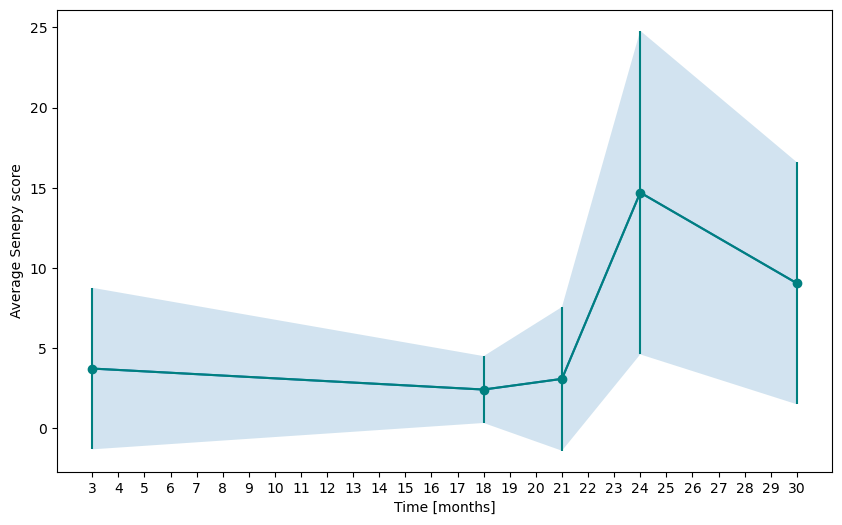

In [19]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


Visualize results for endothelial cells

<Axes: >

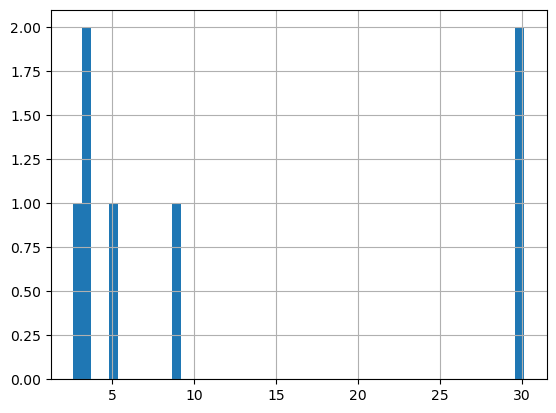

In [20]:
ec_sen.obs.sen_score_combined.hist(bins = 50)

In [21]:
## Calculate mean sen score for each timepoint
#Hepatocytes

# define cell groups per timepoint
m3_sen = ec_subset_combo[ec_subset_combo.obs.age == '3m']
m18_sen = ec_subset_combo[ec_subset_combo.obs.age == '18m']
m21_sen = ec_subset_combo[ec_subset_combo.obs.age == '21m']
m24_sen = ec_subset_combo[ec_subset_combo.obs.age == '24m']
m30_sen = ec_subset_combo[ec_subset_combo.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df

,Age,Mean,Std,N-cells
0,3,0.051831,0.157727,19
1,18,0.702945,0.856343,27
2,21,0.175081,0.247959,14
3,24,0.469799,0.586982,7
4,30,1.079947,1.627337,88


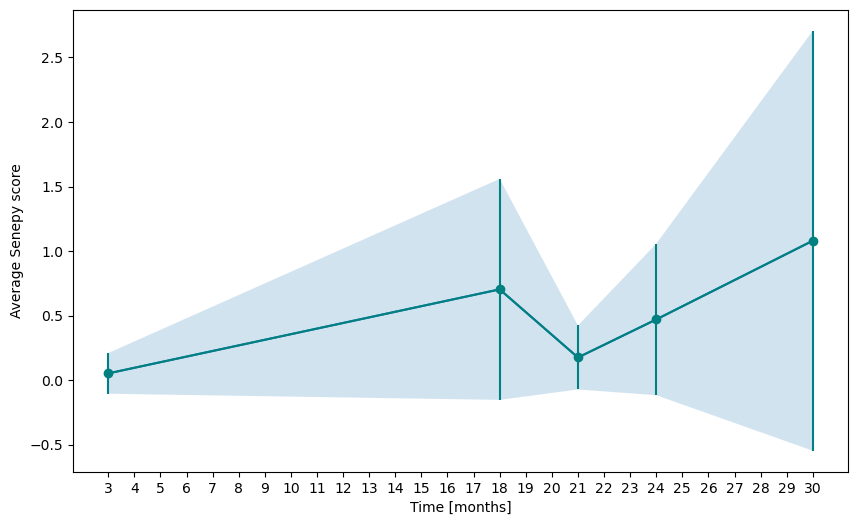

In [22]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


UMAPs

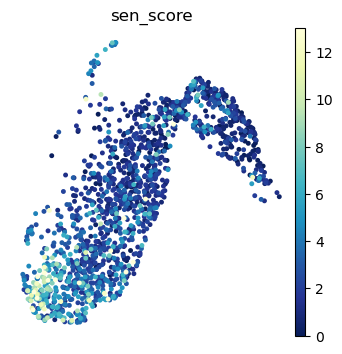

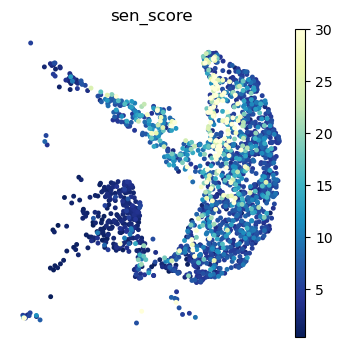

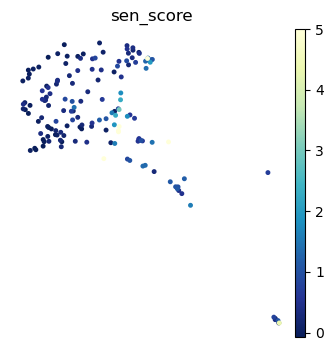

In [61]:

with rc_context({'figure.figsize': (4, 4)}):
        sc.pl.umap(hep_subset_combo, color=['sen_score'], s=50, frameon=False,  vmax= 13, cmap='YlGnBu_r')
        
        sc.pl.umap(kup_subset_combo, color='sen_score', s=50, frameon=False,  vmax = 30, cmap='YlGnBu_r')

        sc.pl.umap(ec_subset_combo, color='sen_score', s=50, frameon=False,  vmax= 5, cmap='YlGnBu_r')


Merge 

In [37]:
both_subset_combo = kup_subset_combo.concatenate(hep_subset_combo)
both_subset_combo = both_subset_combo.concatenate(ec_subset_combo)

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\mi

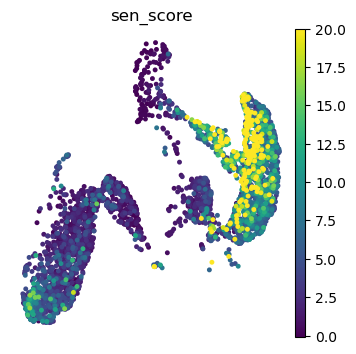

In [63]:
with rc_context({'figure.figsize': (4, 4)}):
        sc.pl.umap(both_subset_combo, color=['sen_score'], s=50, frameon=False, vmax = 20, cmap='viridis')

Calculate graphics with score

In [ ]:

## Calculate mean sen score for each timepoint

# define cell groups per timepoint
m3_sen = both_subset_combo[both_subset_combo.obs.age == '3m']
m18_sen = both_subset_combo[both_subset_combo.obs.age == '18m']
m21_sen = both_subset_combo[both_subset_combo.obs.age == '21m']
m24_sen = both_subset_combo[both_subset_combo.obs.age == '24m']
m30_sen = both_subset_combo[both_subset_combo.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\mi

,Age,Mean,Std,N-cells
0,3,2.083305,1.966419,1021
1,18,2.107133,1.783930,515
2,21,4.362477,3.811645,289
3,24,5.711800,6.876274,103
4,30,8.552077,7.548904,1773


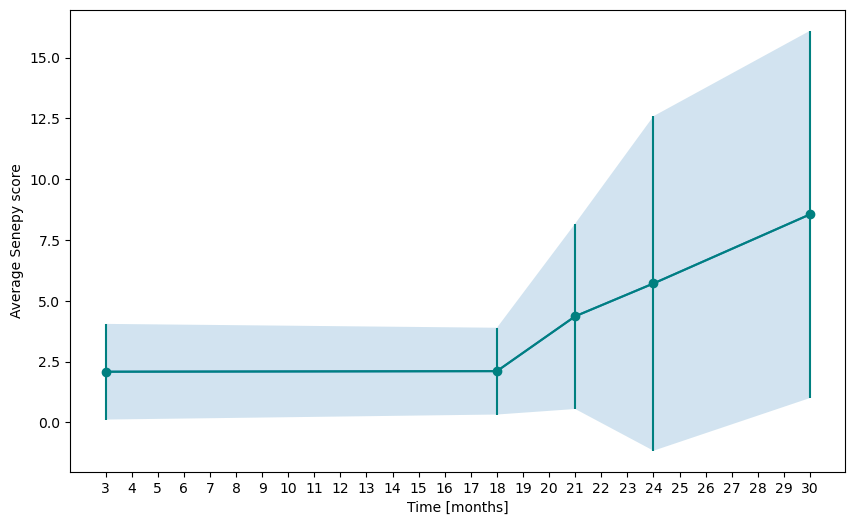

In [ ]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


In [ ]:
# calc with replicates

per_mouse_sen = pd.DataFrame(index = ['mouse_id'])
per_mouse_sen.index = both_subset_combo.obs['donor_id'].unique()
per_mouse_sen['expression'] = both_subset_combo.obs.groupby('donor_id')['sen_score'].mean()

per_mouse_sen.reset_index(drop = False, inplace=True)
per_mouse_sen.rename(columns = {'index': 'mouse_id'}, inplace=True)

per_mouse_sen['timepoints'] = per_mouse_sen['mouse_id'].str.split('-', n=1).str[0].astype(int)
per_mouse_sen['plate_id'] = per_mouse_sen.groupby('timepoints').cumcount() + 1
per_mouse_sen.drop('mouse_id', axis = 1, inplace=True)
per_mouse_sen['statevariable'] = 'SC'
per_mouse_sen

,expression,timepoints,plate_id,statevariable
0,2.107133,18,1,SC
1,4.362477,21,1,SC
2,10.299125,24,1,SC
3,9.162677,30,1,SC
4,6.745723,30,2,SC
5,2.213274,30,3,SC
6,2.255117,3,1,SC
7,2.389555,3,2,SC
8,4.082093,24,2,SC
9,1.819562,3,3,SC


In [ ]:
# adapt sen dataframe
senscore_all_df['Age'] = senscore_all_df['Age'].map(float)
senscore_all_df = senscore_all_df.set_index('Age')
sen_genes = senscore_all_df[['Mean']]
sen_genes = sen_genes.reset_index()
sen_genes = sen_genes.rename(columns = {'Age': 'timepoints', 'Mean': 'expression'})
sen_genes['timepoints'] = sen_genes['timepoints'].map(str)
sen_genes['expression'] = sen_genes['expression'].map(str)
sen_genes['statevariable'] = 'SC'
sen_genes

,timepoints,expression,statevariable
0,3.0,2.083305121518523,SC
1,18.0,2.10713319550184,SC
2,21.0,4.362477181739955,SC
3,24.0,5.71180028953027,SC
4,30.0,8.552077017937549,SC


In [ ]:
# save all cells with calculated senescence score

#both_subset_combo.write_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//all_sen_score_ec.h5ad')